In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Data_Analysis_using_python/dermatology_database_1.csv')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

In [ ]:
data.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 358 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   erythema                             358 non-null    int64  
 1   scaling                              358 non-null    int64  
 2   definite_borders                     358 non-null    int64  
 3   itching                              358 non-null    int64  
 4   koebner_phenomenon                   358 non-null    int64  
 5   polygonal_papules                    358 non-null    int64  
 6   follicular_papules                   358 non-null    int64  
 7   oral_mucosal_involvement             358 non-null    int64  
 8   knee_and_elbow_involvement           358 non-null    int64  
 9   scalp_involvement                    358 non-null    int64  
 10  family_history                       358 non-null    int64  
 11  melanin_incontinence                 

In [ ]:
data.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
count,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,...,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000
mean,2.078212,1.807263,1.569832,1.354749,0.636872,0.449721,0.170391,0.379888,0.622905,0.530726,...,0.474860,0.460894,0.949721,0.458101,0.106145,0.117318,1.877095,0.558659,36.296089,2.782123
std,0.664865,0.701541,0.900909,1.135062,0.908709,0.956468,0.576394,0.837388,0.990278,0.912352,...,0.871705,0.959914,1.129060,0.959796,0.455180,0.493863,0.699324,1.107990,15.324557,1.593936
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000,3.000000
75%,2.750000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,49.750000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000,6.000000


In [ ]:
data.isnull()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
362,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
363,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
364,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

,0
erythema,0
scaling,0
definite_borders,0
itching,0
koebner_phenomenon,0
polygonal_papules,0
follicular_papules,0
oral_mucosal_involvement,0
knee_and_elbow_involvement,0
scalp_involvement,0


In [ ]:
# Preprocessing: Convert 'age' to numeric and handle non-numeric values
data['age'] = pd.to_numeric(data['age'], errors='coerce')
data.dropna(subset=['age'], inplace=True)

# Split features and target
X = data.drop(columns=['class'])
y = data['class']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **Split the data into train and test and train SVM, RF.**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Train SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)

print("SVM Classification Report:")
print(classification_report(y_test, svm_preds))

SVM Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        22
           2       1.00      0.86      0.92        14
           3       1.00      1.00      1.00        14
           4       0.80      1.00      0.89         8
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00         2

    accuracy                           0.97        72
   macro avg       0.97      0.98      0.97        72
weighted avg       0.98      0.97      0.97        72



In [ ]:
# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_preds))

Random Forest Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        22
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        14
           4       0.89      1.00      0.94         8
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00         2

    accuracy                           0.99        72
   macro avg       0.98      0.99      0.98        72
weighted avg       0.99      0.99      0.99        72



# **The outliers, remove the outliers and again train SVM, RF.**

In [ ]:
z_scores = np.abs(zscore(X_scaled))
threshold = 3
non_outliers = (z_scores < threshold).all(axis=1)

X_no_outliers = X_scaled[non_outliers]
y_no_outliers = y[non_outliers]

In [ ]:
X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

In [ ]:
# Retrain SVM
svm_model_no = SVC(random_state=42)
svm_model_no.fit(X_train_no, y_train_no)
svm_preds_no = svm_model_no.predict(X_test_no)

print("SVM Classification Report (No Outliers):")
print(classification_report(y_test_no, svm_preds_no))

SVM Classification Report (No Outliers):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       1.00      0.83      0.91         6
           3       1.00      1.00      1.00         9
           4       0.92      1.00      0.96        12
           5       1.00      1.00      1.00         4

    accuracy                           0.98        51
   macro avg       0.98      0.97      0.97        51
weighted avg       0.98      0.98      0.98        51



In [ ]:
rf_model_no = RandomForestClassifier(random_state=42)
rf_model_no.fit(X_train_no, y_train_no)
rf_preds_no = rf_model_no.predict(X_test_no)

print("Random Forest Classification Report (No Outliers):")
print(classification_report(y_test_no, rf_preds_no))

Random Forest Classification Report (No Outliers):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       0.83      0.83      0.83         6
           3       1.00      1.00      1.00         9
           4       0.92      0.92      0.92        12
           5       1.00      1.00      1.00         4

    accuracy                           0.96        51
   macro avg       0.95      0.95      0.95        51
weighted avg       0.96      0.96      0.96        51



# **Plot histograms for each column**

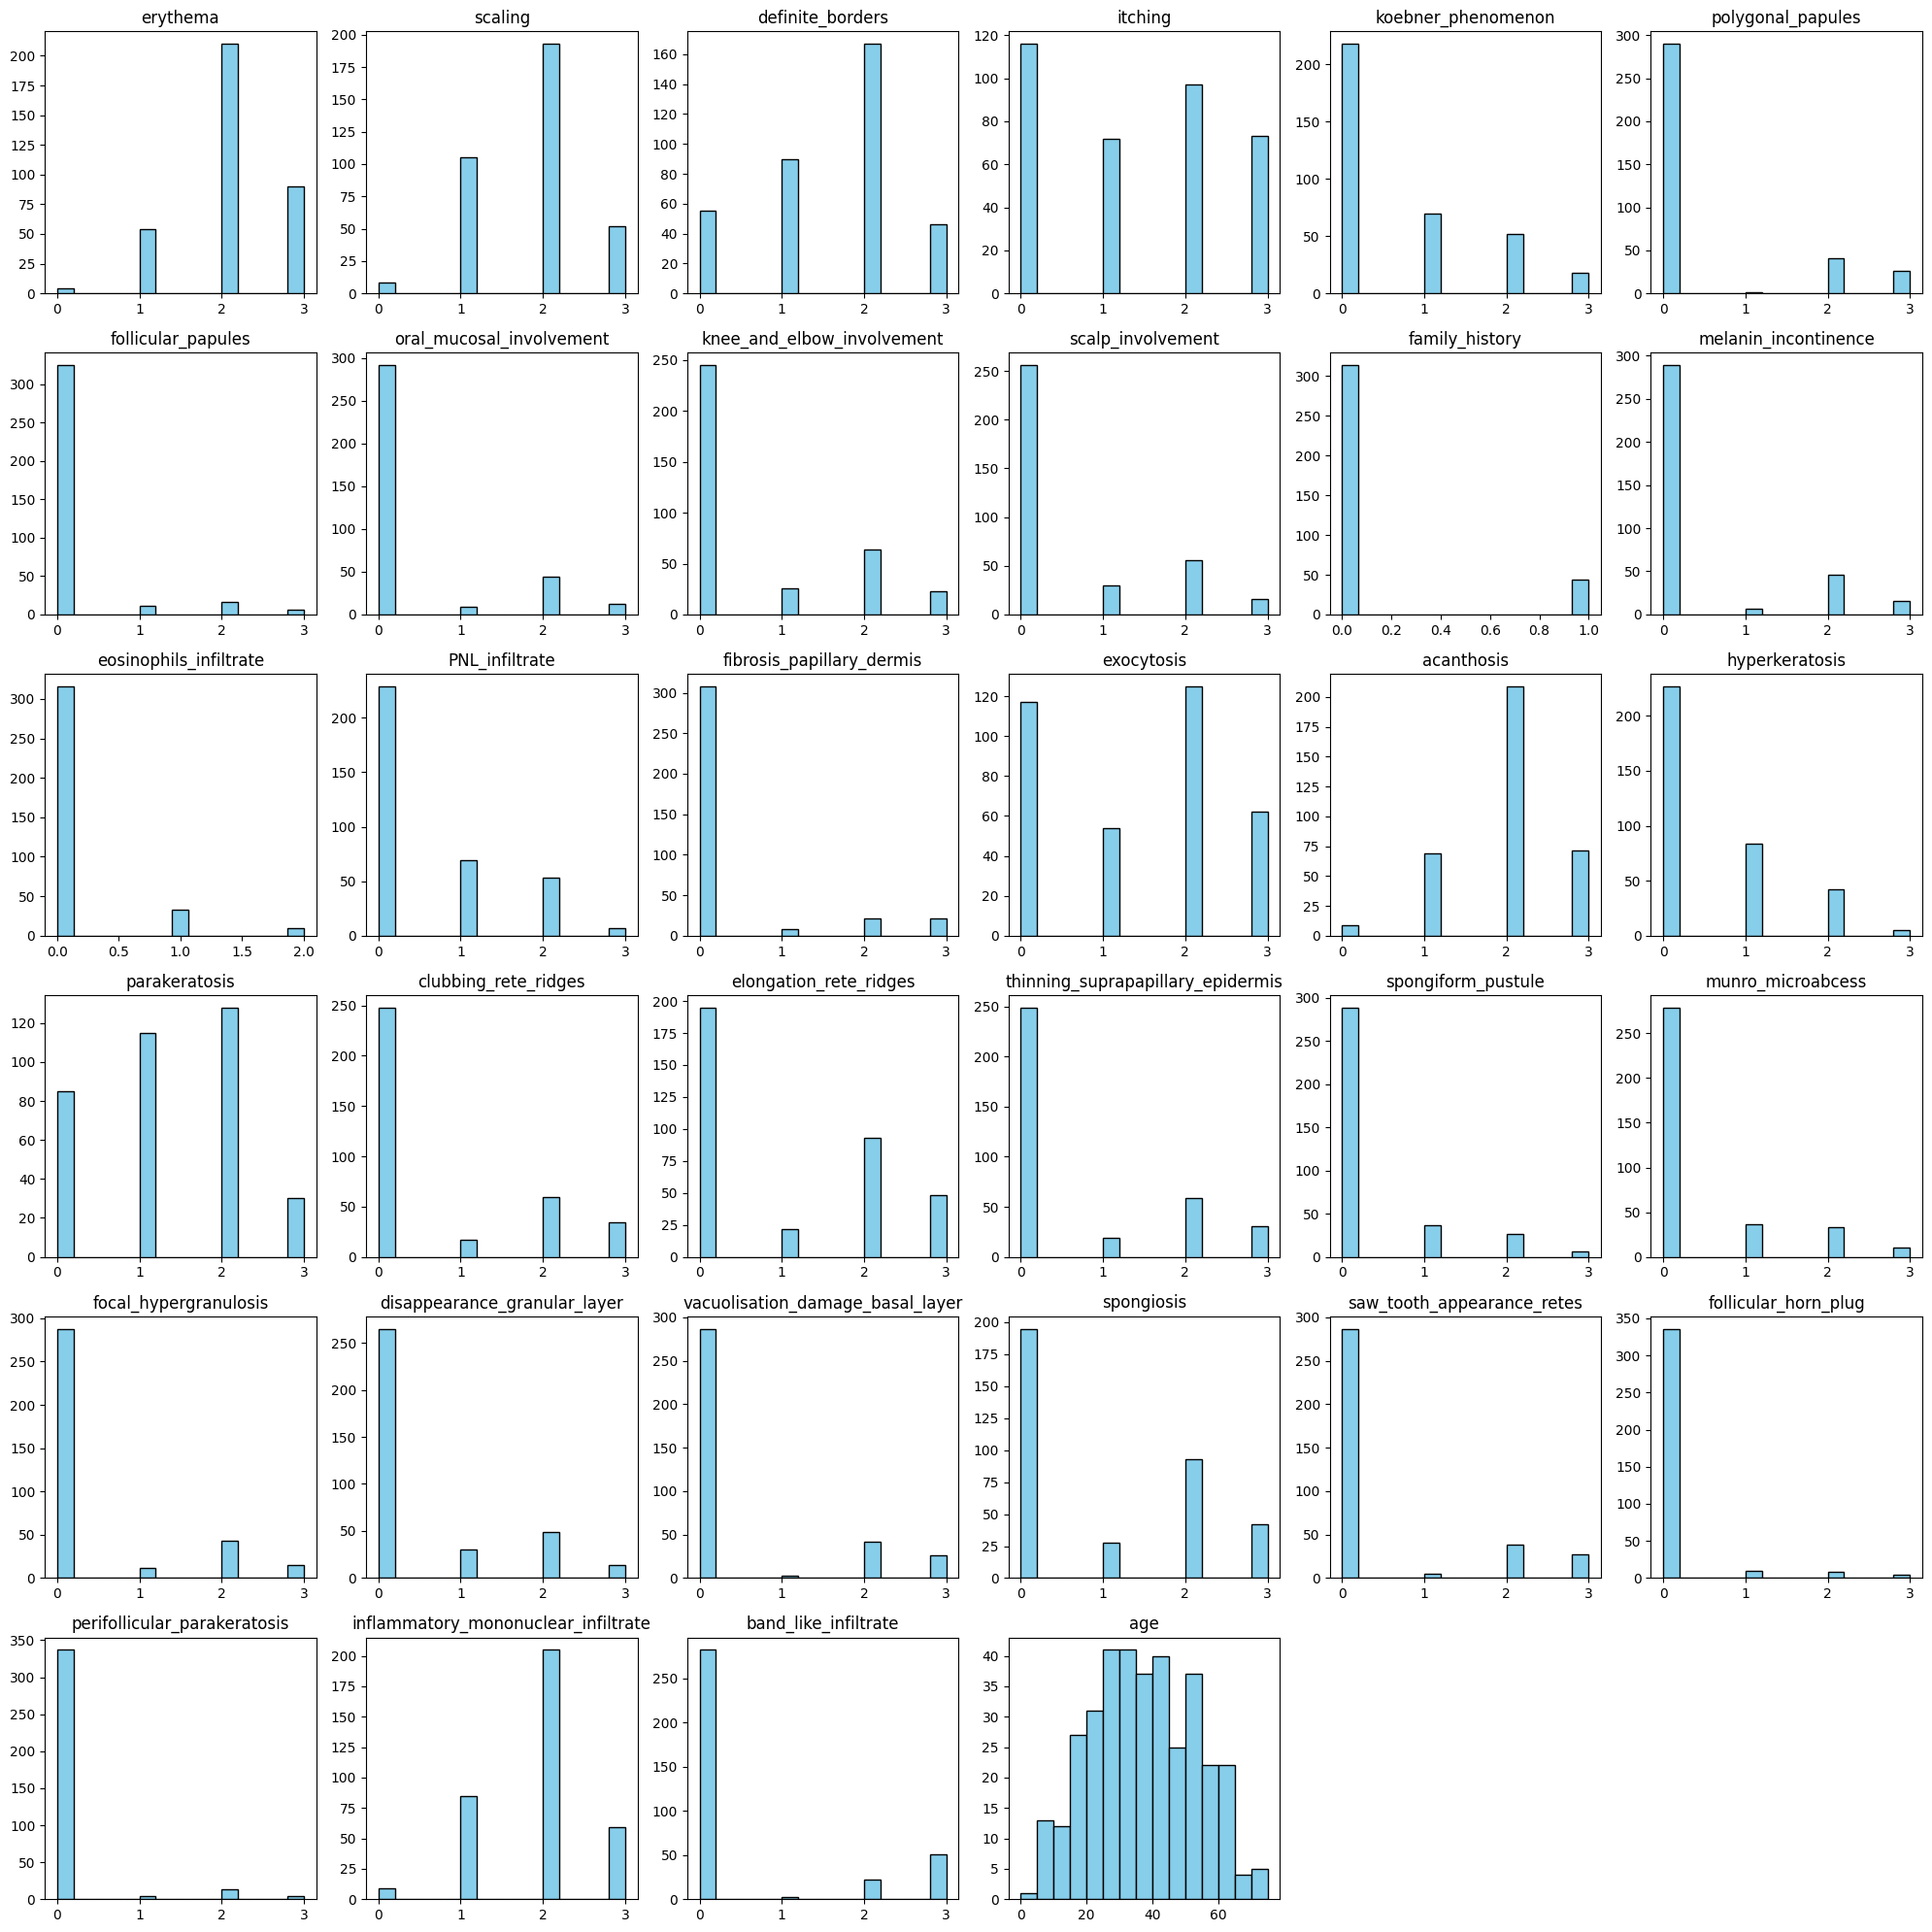

In [ ]:
columns = data.columns[:-1]  # Exclude the 'class' column
plt.figure(figsize=(20, 20))

for i, column in enumerate(columns, 1):
    plt.subplot(6, 6, i)
    plt.hist(data[column], bins=15, color='skyblue', edgecolor='black')
    plt.title(column)
    plt.tight_layout()

plt.show()